# Simple Linear Regression

## 背景描述
纸制品的**抗拉强度**与**纸浆中硬木的含量**有关。在试验工厂生产了10个样品。

## 数据描述

|           变量名           | 变量含义 |      变量类型       |  变量取值范围  |
| :------------------------: | :------: | :-----------------: | :------------: |
| （自变量）Percent_Hardwood | 硬木含量 |  discrete variable  | $\mathbb{Z}^+$ |
|     （因变量）Strength     | 抗拉强度 | continuous variable |  $\mathbb{R}$  |

## 问题 

注：这里使用 \alpha=0.05 的显著性水平

1. 请用统计模型描述**纸浆中硬木的含量**与纸制品的**抗拉强度**的关系.
2. 请问Q1中所建立的模型是否合理.
3. 如果需要纸制品的硬木含量为 18，请给出一个合理区间，预测纸制品的**抗拉强度**应为多少.



## 解决方案

**Q1:**  
列出线性模型为：$Strength = \beta_0 + \beta_1*Hardwood + \epsilon$

In [3]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

alpha = 0.05
n = 10

x = pd.read_csv('data/Project4.csv')
data = x.values[:,1:3]
df = pd.DataFrame(data, columns = ['Hardwood', 'Strength'])
print(df.head())
print('\n')
print(np.var(data[:,0]))

# Do the simple linear regression
model = ols('Strength ~ Hardwood', df).fit()
beta = model.params
print('参数估计值: \n', round(beta, 4))
model.summary()

   Hardwood  Strength
0        10       160
1        15       171
2        15       175
3        20       182
4        20       184


35.76
参数估计值: 
 Intercept    143.8244
Hardwood       1.8786
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     260.0
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           2.20e-07
Time:                        13:21:13   Log-Likelihood:                -20.973
No. Observations:                  10   AIC:                             45.95
Df Residuals:                       8   BIC:                             46.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    143.8244      2.522     57.039      0.000     138.010     149.639
Hardwood       1.8786      0.117     16.125      0.000       1.610       2.147
==============================================================================
Omnibus:                        1.211   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.701
Skew:                           0.157   Prob(JB):                        0.704
Kurtosis:                       1.742   Cond. No.                         78.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Strength_hat = 143.8244 + 1.8786 * Hardwood


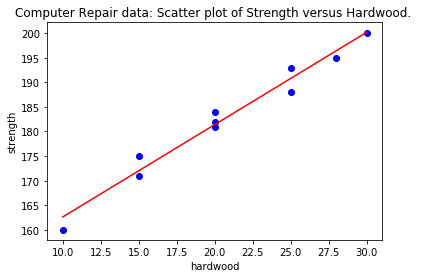

In [2]:
# 输出一元线性回归方程
print('Strength_hat =', round(beta[0], 4), '+', round(beta[1], 4), '* Hardwood')

# 画图
x = data[:, 0]
y = data[:, 1]
Y = model.fittedvalues   # 预测值
plt.scatter(x, y, c = 'blue', label='Strength') # 原始数据
plt.plot(x, Y, 'red', label='Fit_Strength') # 拟合数据
plt.title('Computer Repair data: Scatter plot of Strength versus Hardwood. ')
plt.xlabel('hardwood')
plt.ylabel('strength')
plt.show()

由此可知，该线性回归模型为：$Strength = 143.8244 + 1.8786 * Hardwood$

**Q2:**  
检验假设：$H_0: \beta_1=0$ vs $H_1: \beta_1 \neq 0$

In [4]:
# 求解相关项
x_mean = np.mean(data[:,0])  # 自变量 x 的均值
y_mean = np.mean(data[:,1])  # 因变量 y 的均值
sigma2 = sum((y - beta[0] - beta[1] * x) ** 2) / (n - 2)  # 方差
sigma = np.sqrt(sigma2)  # 标准差
lxx = sum((x - np.mean(x)) ** 2)  # 求l_xx
lyy = sum((y - np.mean(y)) ** 2)  # 求l_yy
lxy = sum((x - np.mean(x)) * (y - np.mean(y)))  # 求l_xy

**一元线性模型的显著性检验——F 检验:**

In [5]:
# F检验
anova_results = round(anova_lm(model), 2)
print('The ANOVA table: \n', anova_results)

# 法1：
pVal1 = anova_results['PR(>F)'][0]
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2：
F0 = anova_results['F'][0]
F = round(f.ppf(1 - alpha, dfn = 1,dfd = n - 2), 2)
if F0 > F:
    print('Since F0 > F(0.95, 1, 12) = ', F, ', reject H0.')
else:
    print('Accept H0.') 

The ANOVA table: 
            df   sum_sq  mean_sq      F  PR(>F)
Hardwood  1.0  1262.07  1262.07  260.0     0.0
Residual  8.0    38.83     4.85    NaN     NaN

Since p-value < 0.05, reject H0.
Since F0 > F(0.95, 1, 12) =  5.32 , reject H0.


In [6]:
# t检验
t0 = beta[1] * np.sqrt(lxx) / sigma  # 求t值
print('t0值为：', round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - 2)  # 分位点函数（CDF的逆）
print('t的临界值为：', round(tVal, 4))
pVal2 = t.sf(t0, n - 2)  # 用残存函数（1-CDF）求p值 
# pVal2 = 1 - t.cdf(t0, n - 2)
print('P值为：', round(pVal2, 4))

# 法1：
if pVal2 < alpha:
    print ('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.')
    
# 法2：
if abs(t0) > tVal:
    print('Since t0 > t(0.975,12) = ', round(tVal, 4), ', reject H0.')
else:
    print('Accept H0.') 

t0值为： 16.1245
t的临界值为： 2.306
P值为： 0.0

Since p-value < 0.05, reject H0.
Since t0 > t(0.975,12) =  2.306 , reject H0.


**相关系数的检验:**  
检验假设：$H_0: \rho=0$ vs $H_1: \rho \neq 0$

In [13]:
# 相关系数检验
# 法1：代公式求得
r1 = lxy / np.sqrt(lxx * lyy)
print('法 1 求得的相关系数：', round(r1, 4))

# 法2：用pandas中DataFrame对象corr()方法
r2 = df.corr()
print('法 2 求得的相关系数：\n', round(r2, 4))

rVal = np.sqrt(F / (F + (n - 2)))
if abs(r1) > rVal:
    print ('\nSince r > r(0.975, 12) = ', round(rVal, 4), ', reject H0.')
else:
    print('\nAccept H0.')


法 1 求得的相关系数： 0.985
法 2 求得的相关系数：
           Hardwood  Strength
Hardwood     1.000     0.985
Strength     0.985     1.000

Since r > r(0.975, 12) =  0.632 , reject H0.


由此可知，Q1中所建立的模型(线性关系)是合理的。

**残差分析0: 计算抗拉强度的残差**

In [14]:
# 计算残差
data_res = data * 1
for i in range(n):
    data_res[:,1] = y - Y
df = pd.DataFrame(data_res, columns = ['Hardwood', 'Strength_res'])
print(df.head())

   Hardwood  Strength_res
0        10            -2
1        15            -1
2        15             2
3        20             0
4        20             2


**残差分析1: 残差的正态概率图** 

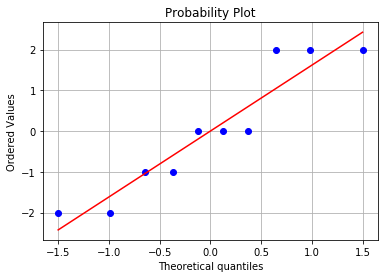

[-2 -2 -1 -1  0  0  0  2  2  2]


In [18]:
# 残差的正态概率图
res = data_res[:, 1]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
plt.grid()
plt.show()
print(osm[1])

In [20]:
sse = 0
for r in data_res[:,1]:
    sse += r**2
# sse自由度为n-2
mse = sse/(n-2)
print('MSE为',mse)

MSE为 2.75


无特别的证据说明违背数据正态性；
异常值的检测：
$2/\sqrt{2.75}=1.2<2$

说明无明显的异常值，说明残差是服从正态分布的。  
  
(计算标准化残差：$d_{ij} = \frac{e_{ij}}{\sqrt{MS_E}}$。一般地，标准化残差约 68% 落在 ±1 之内，约 95% 落在 ±2 之内，几乎全部落在 ±3 之内。标准化残差的绝对值大于3的残差是一个可能的异常值。)

In [21]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal = stats.shapiro(res)
print(round(SW, 2))
print(round(pVal, 2))

if pVal > alpha:
    print('\nAccept the null hypothesis.')
else:
    print('\nSince p-value > 0.05, reject the null hypothesis') 

0.87
0.1

Accept the null hypothesis.


**残差分析2: 残差与拟合值的关系图**

Text(0, 0.5, 'e_i')

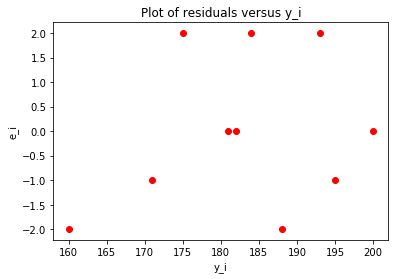

In [22]:
# 残差与预测值的关系图
plt.scatter(data[:,1], res, c = 'red')
plt.title('Plot of residuals versus y_i')
plt.xlabel('y_i')
plt.ylabel('e_i')

**Q3:**

**关于 $E(y_0)$ 的估计:**

In [13]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    Y0 = beta[0] + beta[1] * float(x0)
    delta0 = tVal * sigma * np.sqrt(1 / n + (float(x0) - x_mean) ** 2 / lxx)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

x0 = input()
print('给定 x = %d, E(y_0) 的置信区间：'%int(x0), np.round(confidence_interval(x0), 4))

18
给定 x = 18, E(y_0) 的置信区间： [159.5675 195.7121]


In [ ]:
**关于 $y_0$ 的预测:**

In [ ]:
# 给定 x_0，求 y_0 的预测区间
def confidence_interval(x0):
    Y0 = beta[0] + beta[1] * float(x0)
    delta1 = tVal * sigma * np.sqrt(1 + 1 / n + (float(x0) + x_mean) ** 2 / lxx)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int

x00 = input()
print('给定 x = %d, y_0 的预测区间：'%int(x00), np.round(confidence_interval(x0), 4))